# EDA

In [3]:
import pandas as pd
import os
import timm
import numpy as np

data_table_path = 'data/data.csv'
images_path = 'data/images'

C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = pd.read_csv(data_table_path)

In [6]:
data.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,search_tags,template_id,landing_page,advertiser_id,...,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,5/1/22,128,Facebook Ads,1000,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,...,8,SGD,SGD,1,14.058514,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,5/2/22,16,DV360,1000,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,...,44,SGD,SGD,1,99.633496,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,5/3/22,128,Facebook Ads,1000,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,...,32,SGD,SGD,1,109.419677,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,5/4/22,128,Facebook Ads,1000,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,...,48,SGD,SGD,1,115.209499,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,5/5/22,4,Google Ads,1000,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,...,20,SGD,SGD,1,66.990104,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [7]:
data.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'search_tags', 'template_id',
       'landing_page', 'advertiser_id', 'advertiser_name', 'network_id',
       'approved_budget', 'advertiser_currency', 'channel_id', 'channel_name',
       'max_bid_cpm', 'network_margin', 'campaign_budget_usd', 'impressions',
       'clicks', 'stats_currency', 'currency_code', 'exchange_rate',
       'media_cost_usd', 'search_tag_cat', 'cmi_currency_code', 'timezone',
       'weekday_cat', 'keywords'],
      dtype='object')

In [8]:
data.shape

(72612, 30)

The dataset consists of more than 72k campaigns, from which we are given 30 fields of information each (listed above). These are described in the provided Readme file, that we reproduce here for convenience:


- **campaign_item_id**: Unique identifier for each campaign item.
- **no_of_days**: Duration in days the ad campaign ran.
- **time**: The date on which the ad campaign was executed.
- **ext_service_id**: Identifier for the external service used for the ad campaign.
- **ext_service_name**: Name of the external service platform (e.g., Facebook Ads, Google Ads).
- **creative_id**: Identifier for the creative content used in the ad.
- **search_tags**: Tags associated with the ad for search optimization.
- **template_id**: Identifier for the ad template used.
- **landing_page**: URL of the landing page linked to the ad.
- **advertiser_id**: Unique identifier for the advertiser.
- **advertiser_name**: Name of the advertiser.
- **network_id**: Identifier for the ad network.
- **approved_budget**: Budget approved for the ad campaign in the advertiser's currency.
- **advertiser_currency**: Currency used by the advertiser.
- **channel_id**: Identifier for the ad channel used.
- **channel_name**: Name of the ad channel (e.g., Mobile, Social, Video).
- **max_bid_cpm**: Maximum bid for cost per thousand impressions.
- **network_margin**: Margin of the ad network.
- **campaign_budget_usd**: Budget for the campaign in USD.
- **impressions**: Number of times the ad was displayed.
- **clicks**: Number of clicks the ad received.
- **stats_currency**: Currency used for the ad performance stats.
- **currency_code**: Code for the currency.
- **exchange_rate**: Exchange rate used for currency conversion.
- **media_cost_usd**: Media cost of the ad in USD.
- **search_tag_cat**: Category of the search tag.
- **cmi_currency_code**: Currency code used in cost per impression.
- **timezone**: Timezone of the ad campaign.
- **weekday_cat**: Category indicating if the campaign was run on a weekday or weekend.
- **keywords**: Keywords associated with the ad campaign.

With the goal to predict the effectiveness of the ads creatives associated to each campaign, we can identify two important columns in the table: impressions and clicks. A effectiveness metric can be defined by the ratio between the two, click to impressions (views) ratio. Let's add it as a new column (expressed as a %):

In [9]:
data['ctir'] = data['clicks'] / data['impressions'] * 100

In [10]:
data['ctir'].describe()

count    72612.000000
mean         1.745022
std          3.091797
min          0.088731
25%          0.936476
50%          1.371951
75%          1.876173
max        265.611691
Name: ctir, dtype: float64

The average value is 1.7%. And we can see that most of campaigns are centered close to this value. However, one or more outliers with high values are distorting the distribution. Values above 100 seem suspictious. If clicking brings the consumer to a different web, is it possible that they view again later the same ad, click it, and it counts as a new click but not as a new impression?. 

In [11]:
data[data['ctir'] > 100][['creative_id', 'clicks','impressions']]

,creative_id,clicks,impressions
16253,3200,13088,12174
16254,3200,28401,12010
16255,3200,31807,11975
16256,3200,20644,11197
69556,13890,4485,4264
70317,14240,9650,8373
70319,14240,11538,8127
70320,14240,12941,7930
71520,14785,7928,6361


Actually, values above 10% seem to be extremelly rare already in the industry, and there are quite a few in the provided dataset

In [12]:
print(f'Campaigns with CTIR > 10%: {(data['ctir'] > 10).sum()}')

Campaigns with CTIR > 10%: 388


Let's plot the CTIR distribution for the rest.

<Axes: ylabel='Density'>

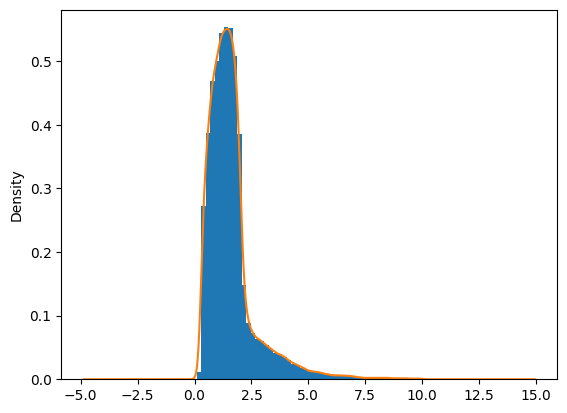

In [13]:
data[data['ctir'] < 10]['ctir'].plot.hist(bins=50, density=True)
data[data['ctir'] < 10]['ctir'].plot(kind='density')

As indicated by the percentiles before, the probability mass is very concentrated between 0 and 2.5, but the distribution shows a very heavy tail to the right (and here we have removed already the extreme values above 10!). These can be very successful campaigns, but some are suspected to be artifacts from possibly incorrect tracking and analytics reports.

<Axes: xlabel='impressions', ylabel='clicks'>

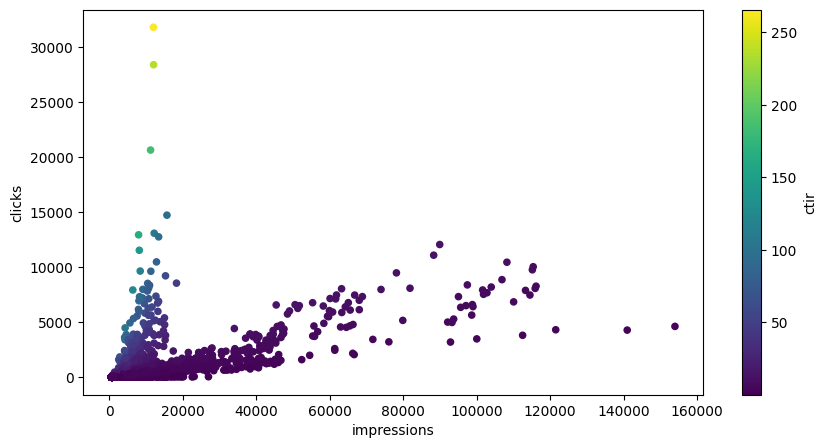

In [14]:
data.plot.scatter(x='impressions', y='clicks', c='ctir', colormap='viridis', figsize=(10, 5))

<Axes: xlabel='impressions', ylabel='clicks'>

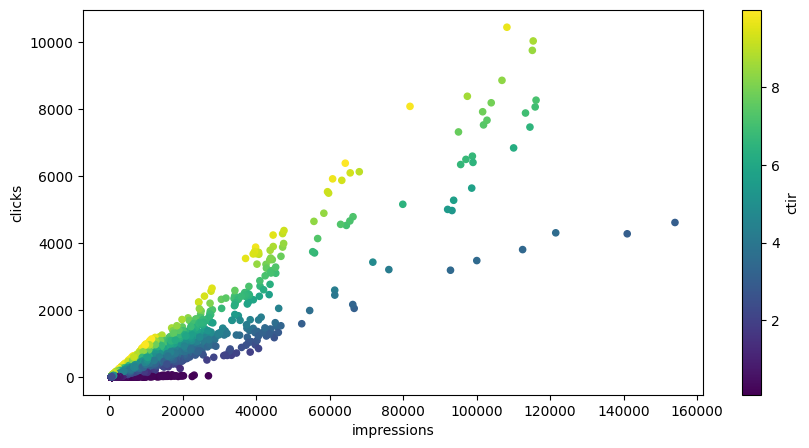

In [15]:
data[data.ctir < 10].plot.scatter(x='impressions', y='clicks', c='ctir', colormap='viridis', figsize=(10, 5))
# the color is the slope

## Unique creatives

Notice that creative_id, identifier of the ad image associated to the campaigns, is not unique per campaign. It will be interesting to consider measuring ad creative effectiveness aggregating campaigns to make it independent of other variables, so will keep that in mind. For the moment, let's see how many different creatives are part of the dataset

In [16]:
len(data['creative_id'].unique())

2922

which should match the number of provided images:

In [17]:
images_list = [f for f in os.listdir(images_path)]
print(f'Number of images = {len(images_list)}')

Number of images = 2922


The amount of times the same image is used in different campaigns is distributed as plotted below:

<Axes: xlabel='Number of campaigns per creative', ylabel='Prob.'>

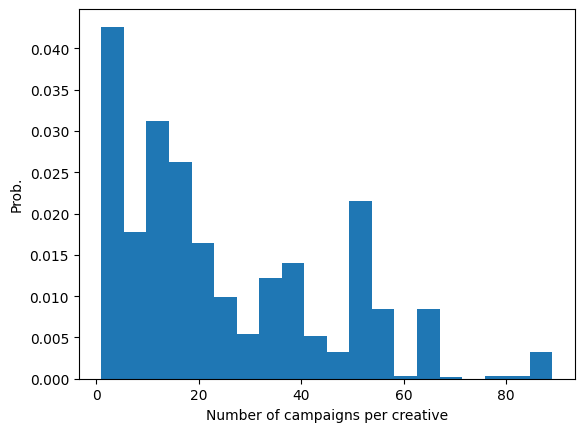

In [18]:
campaigns_per_creative = data['creative_id'].value_counts()
campaigns_per_creative.plot.hist(
    bins=20, density=True, 
    xlabel='Number of campaigns per creative',
    ylabel='Prob.')

where we can see that the reuse of creatives is quite diverse, with a decreasing frequency with the number of campaigns but significant peaks at high count values. See below the all the aggregated counts

<Axes: xlabel='Number of campaigns per creative', ylabel='#'>

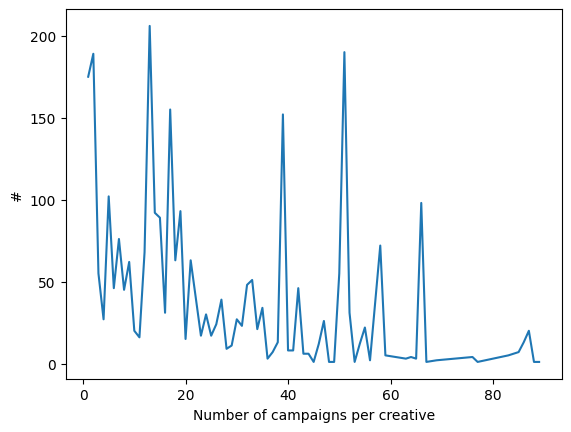

In [19]:
campaigns_per_creative_counts = campaigns_per_creative.value_counts()
campaigns_per_creative_counts.sort_index().plot(
    xlabel='Number of campaigns per creative',
    ylabel='#')

## Duration

Let's bring in the number of days per campaign to have a better insight of what a campaign represents. The relationship with the number of impressions can be informative too

<Axes: ylabel='Frequency'>

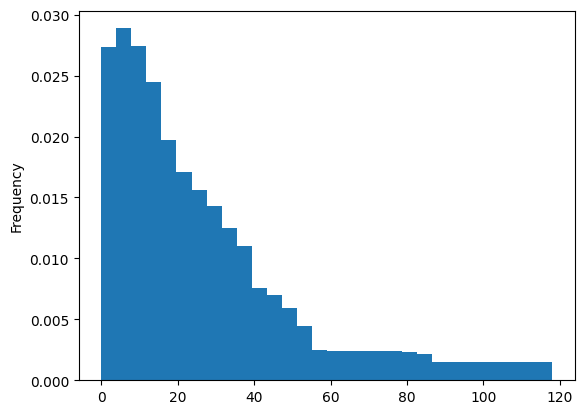

In [20]:
data['no_of_days'].plot.hist(bins=30, density=True)

<Axes: xlabel='no_of_days'>

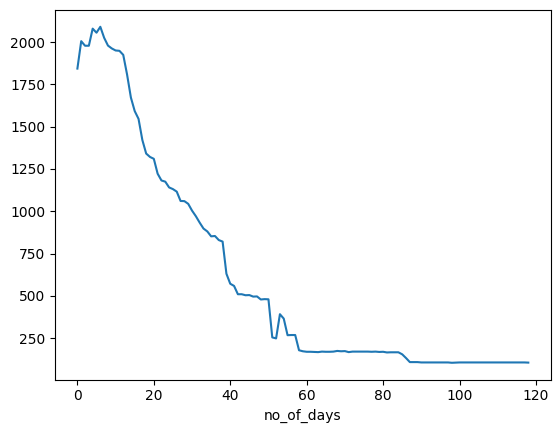

In [21]:
no_of_days_counts = data['no_of_days'].value_counts()
no_of_days_counts.sort_index().plot()

In [22]:
no_of_days_counts.sort_index().tail(10)

no_of_days
109    107
110    107
111    107
112    107
113    107
114    107
115    107
116    107
117    107
118    106
Name: count, dtype: int64

The number ocurrences of campaigns with large number of days is unnatural, with a uniform distribution for a large number of values. This seems to be the result of a selective sampling of campaigns. If the duration is a good indicator of the success of a campaign, this is possibly to increase the sample size of successful ones and lessen the imbalance in the shared dataset.

<Axes: xlabel='no_of_days', ylabel='ctir'>

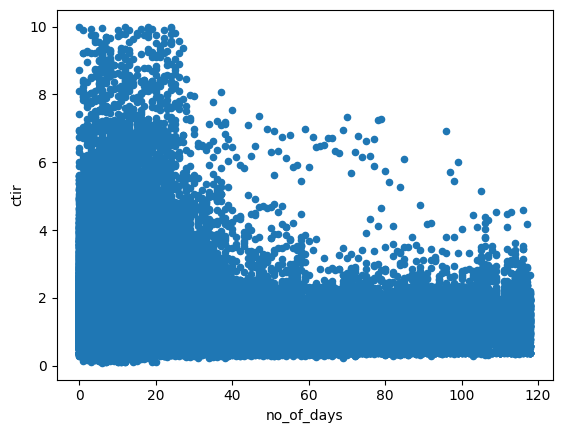

In [23]:
data[data['ctir']<10].plot.scatter(x='no_of_days', y='ctir')

But It does not seem to be the case in terms of CTIR, as there is no evident relationship nor correlation with the number of days. On the contrary, the campaigns with higher CTIR values are the shorter ones.

<Axes: xlabel='no_of_days', ylabel='impressions'>

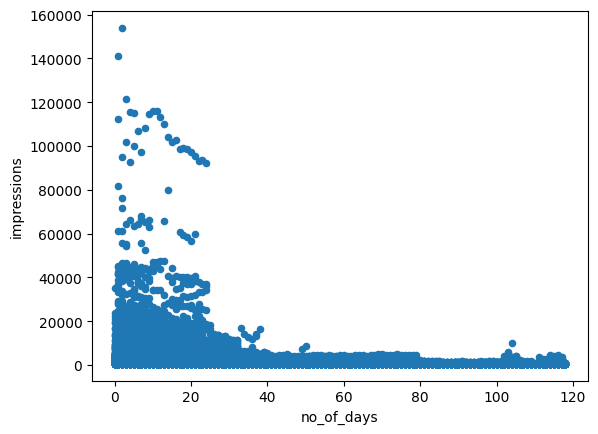

In [24]:
data[data['ctir']<10].plot.scatter(x='no_of_days', y='impressions')

It seems that the duration of campaigns has a relationship with the number impressions. Not with the count itself, but with the order of magnitude. Longer campaigns seem to correspond to be upper bounded in the number of impressions. We will keep this in mind also when we inspect these categorical features.

<Axes: xlabel='impressions', ylabel='clicks'>

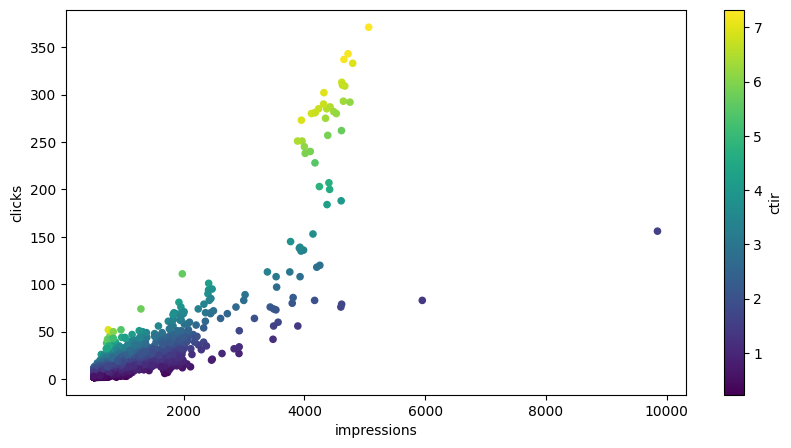

In [25]:
data[(data['ctir']<10) & (data['no_of_days']>50)].plot.scatter(x='impressions', y='clicks', c='ctir', colormap='viridis', figsize=(10, 5))

Actually, this subset of campaigns of longer duration has an interesting click to impression relationship. The clicks seem to grow exponentially after certain number of impressions.
We could define some effectiveness or performance kpi's based on duration also, such as impressions per day or clicks per day, but for this exercise we will stick with CTIR.

## Weekday category

<Axes: ylabel='count'>

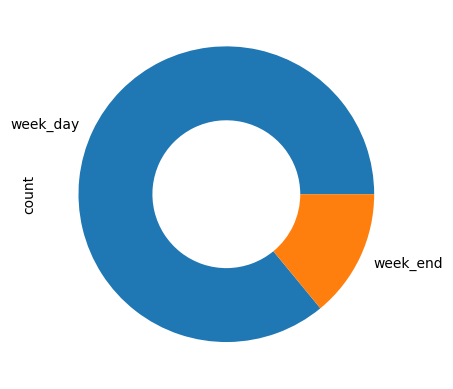

In [26]:
data.weekday_cat.value_counts().plot.pie(wedgeprops=dict(width=0.5))

As expected, a much higher number of week day campaigns

In [27]:
data.groupby('weekday_cat').ctir.describe()

,count,mean,std,min,25%,50%,75%,max
weekday_cat,,,,,,,,
week_day,62424.0,1.751950,3.245873,0.088731,0.938086,1.372213,1.876173,265.611691
week_end,10188.0,1.702577,1.890618,0.133654,0.934579,1.369863,1.876173,81.871436


The CTIR distribution of the campaigns conditioned to the weekday category is practically identical, except for the largest values (outliers with value > 100% are not present on weekends)

## Time
Time (date) is very important, because campaigns do not depend only on the quality of the creative but also on the context around it. The same happens with the reactions of the viewers. Being able to have time-dependant exogenous variables that have some impact on this would be very helpful to avoid missing confounders and establishing false causal relationships between time-independent features of a creative and the performance results.

<Axes: xlabel='time'>

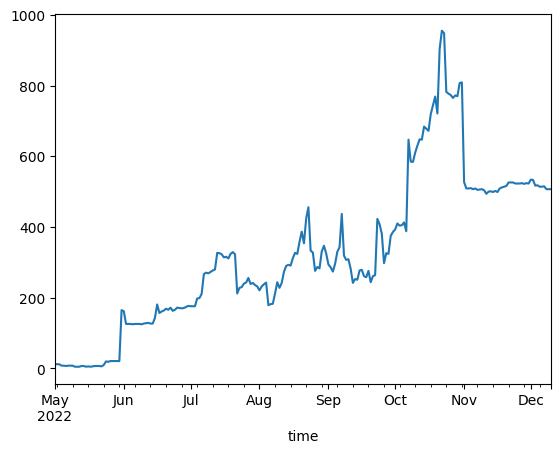

In [28]:
campaigns_per_day = data.groupby('time').size()
campaigns_per_day.index = pd.to_datetime(campaigns_per_day.index, format="%m/%d/%y")
campaigns_per_day.sort_index(inplace=True)
campaigns_per_day.plot()

We can see that we have data of campaigns from May to December 2022. The time series for the daily number of campaigns is quite irregular, with an growing trend that culminates with a peak during October and a big drop at the beginning of November. Then the count stays quite flat.

If we inspect also the CTIR over time,

<Axes: xlabel='time'>

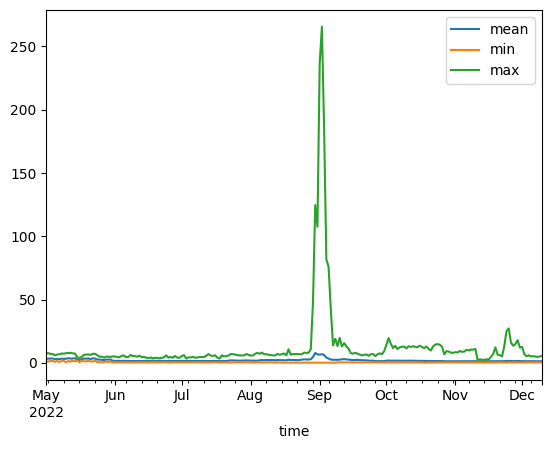

In [29]:
ctir_per_day = data.groupby('time')['ctir'].agg(['mean', 'min', 'max'])
ctir_per_day.index = pd.to_datetime(ctir_per_day.index, format="%m/%d/%y")
ctir_per_day.sort_index(inplace=True)
ctir_per_day.plot()

we can see that not only the largest outliers (CTIR > 100) but campaigns with very large values are concentrated around September. Despite behavior and viewers reaction being quite possibly seasonal and September/end of summer holidays being a significant date, this peak - again - seems an artifact. We will increase the threshold to filter out outliers to 30%.

In [30]:
print(f'{(data.ctir >= 30).sum()} out of {len(data)} campaigns will be considered outliers')
mask_valid_campaigns = data.ctir < 30

109 out of 72612 campaigns will be considered outliers


<Axes: xlabel='time'>

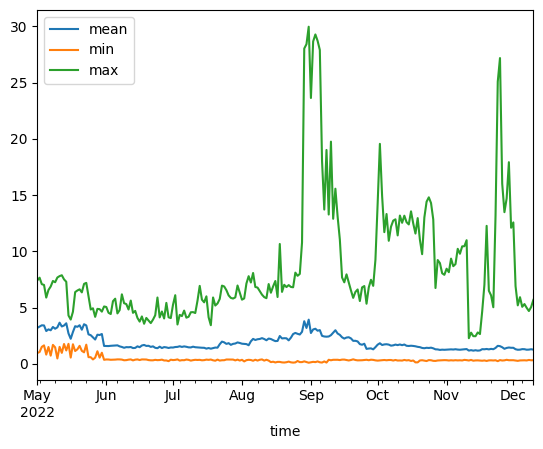

In [31]:
ctir_per_day = data[mask_valid_campaigns].groupby('time')['ctir'].agg(['mean', 'min', 'max'])
ctir_per_day.index = pd.to_datetime(ctir_per_day.index, format="%m/%d/%y")
ctir_per_day.sort_index(inplace=True)
ctir_per_day.plot()

Since we do not have multiple years of data nor other information related to seasonality we are going to ignore for this exercise the temporal component and treat the campaigns as atemporal. This is by no means a valid assumption in a more general scenario, specially if we dispose of daily data for each campaign instead of aggregated for the whole duration, but it is valid for a first approximmation with the goal to focus on creative features alone. It will simplify a lot dealing with the data when training and testing models which, otherwise, should be mandated by time as the estimation of the performance of an ad is at the end a forecast of something ocurring in the future, subject to changes and variable dependencies.

## Location (timezone)
We are given a timezone field that gives information about the location, at least country level. This is also very significant as the cultural differences can be huge and have an important role in the reaction to the campaigns

In [32]:
data.timezone.value_counts()

timezone
Asia/Kolkata        64264
America/New_York     7183
Asia/Muscat           550
Africa/Cairo          475
Asia/Calcutta          89
US/Eastern             46
Asia/Singapore          5
Name: count, dtype: int64

We can see that most campaigns are from India, so whatever result or inshight we can gain it's going to be ineviably biased towards indians citizens. That does not prevent features that are relevant to be valid for any case or even some kind of "universal" recipy for an effective creative. We will introduce a categorical field 'country' which will map mostly the timezone one to one but put together a couple of timezones that belong to the same country.

In [33]:
map_countries = {
    "Asia/Kolkata": "India",
    "America/New_York": "US",
    "Asia/Muscat": "Oman",
    "Africa/Cairo": "Egipt",
    "Asia/Calcutta": "India",
    "US/Eastern": "US",
    "Asia/Singapore": "Singapore"
}

In [34]:
data['country'] = data['timezone'].map(map_countries)

Using this column, we can see that all campaign outliers with suspicious CTIR values come from India

In [35]:
data[~mask_valid_campaigns].groupby('country').size()

country
India    109
dtype: int64

If we plot the distribution of the CTIR now splitting by country, we can see that the heavy tail for high values (after removing extreme cases > 10%, all belonging to India) comes from India as well, with a contribution from Egipt, for which there is bimodal behavior with some campaigns centered around 6% of CTIR.

country
Egipt        Axes(0.125,0.11;0.775x0.77)
India        Axes(0.125,0.11;0.775x0.77)
Oman         Axes(0.125,0.11;0.775x0.77)
Singapore    Axes(0.125,0.11;0.775x0.77)
US           Axes(0.125,0.11;0.775x0.77)
Name: ctir, dtype: object

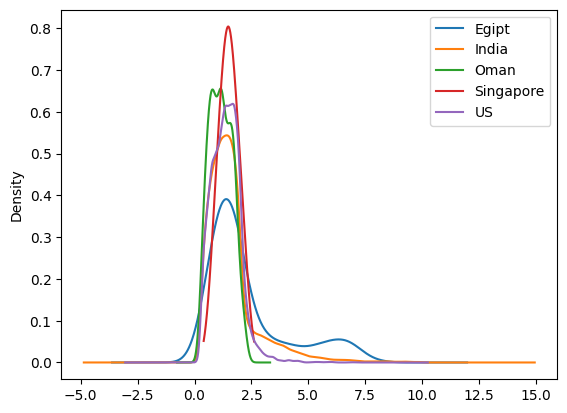

In [36]:
data[data.ctir<10].groupby('country').ctir.plot(kind='density', legend=True)

After observing this, and leaving the quality of the data aside, we can say that the definition of success in terms of CTIR of the campaigns should probably be relative also to the target country

In [37]:
def get_effectiveness_category(data):
    out = pd.Series(index = data.index, data='below_med')
    cat_lower_bounds = pd.Series({
        0.5: 'above_med',
        0.8: 'good',
        0.95: 'excepcional'
    }).sort_index()
    for qval, label in cat_lower_bounds.items():
        q5 = data[mask_valid_campaigns].groupby('country').ctir.quantile(qval)
        for c, q in q5.items():
            out.loc[(data.country==c)&(data.ctir>=q)] = label
    return out
data['effectiveness_cat'] = get_effectiveness_category(data)

<Axes: >

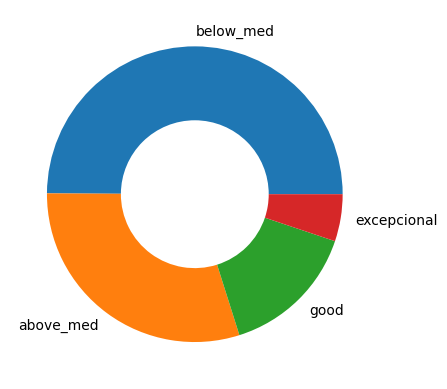

In [38]:
data['effectiveness_cat'].value_counts().plot.pie(wedgeprops=dict(width=0.5), ylabel='')

One of the goals of doing this is to make it a bit more independent of the location.

## Financial kpis
There are several columns related to finance. The approved budget could be a good indicator of quality and predictor of CTIR, but a scatter plot does not indicate any kind of simple linear relationship.

<Axes: xlabel='approved_budget', ylabel='ctir'>

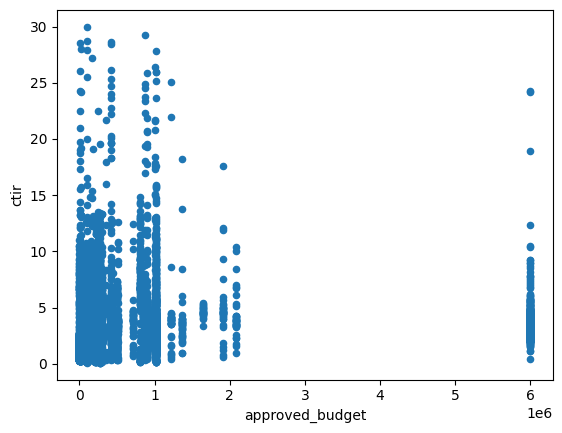

In [39]:
data[mask_valid_campaigns].plot.scatter(x='approved_budget', y='ctir')

<Axes: xlabel='media_cost_usd', ylabel='ctir'>

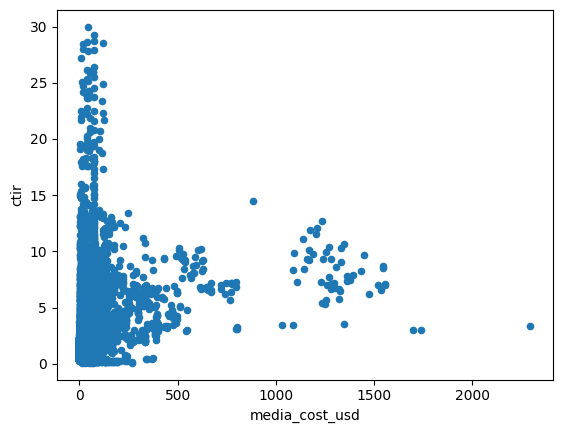

In [40]:
data[mask_valid_campaigns].plot.scatter(x='media_cost_usd', y='ctir')

The media cost shows some correlation, especially for higher cost values. A bit more surprisingly, maybe due to lack of domain expertise, there does not seem to be a direct relationship either between media cost and approved budget. Most costly media turns out to belong to campaigns with the lowest budgets.

<Axes: xlabel='approved_budget', ylabel='media_cost_usd'>

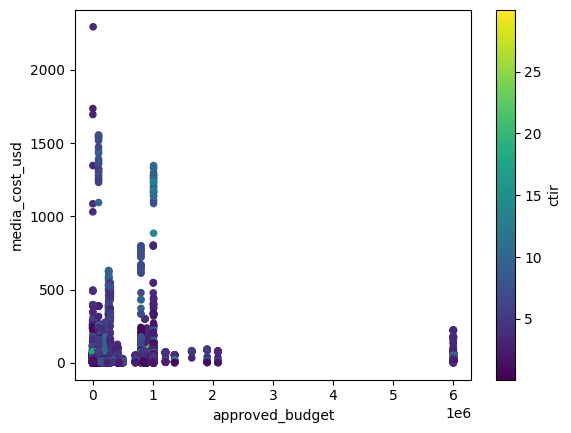

In [41]:
data[mask_valid_campaigns].plot.scatter(x='approved_budget', y='media_cost_usd', c='ctir')

## Channel

<Axes: >

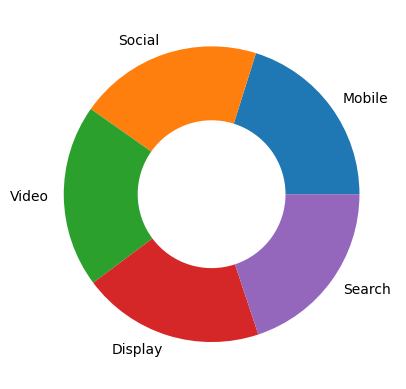

In [42]:
data[mask_valid_campaigns].channel_name.value_counts().plot.pie(wedgeprops=dict(width=0.5), ylabel='')

The channels are very well balanced in the dataset

In [43]:
data[mask_valid_campaigns].groupby('channel_name').ctir.describe()

,count,mean,std,min,25%,50%,75%,max
channel_name,,,,,,,,
Display,14423.0,1.666346,1.436880,0.122825,0.936330,1.369863,1.883562,26.161470
Mobile,14609.0,1.654396,1.416107,0.102722,0.940439,1.369863,1.869159,28.507088
Search,14417.0,1.652174,1.417175,0.104589,0.934579,1.374570,1.872659,28.040164
Social,14554.0,1.652008,1.466317,0.088731,0.931491,1.369863,1.860465,29.980062
Video,14500.0,1.652071,1.405895,0.098264,0.938275,1.369863,1.876173,28.724997


And the CTIR has a very similar distribution regardless of the channel

In [45]:
data[mask_valid_campaigns].groupby('channel_name')[['approved_budget', 'media_cost_usd']].describe()

approved_budget                                                \
                       count           mean            std     min     25%   
channel_name                                                                 
Display              14340.0  123350.386971  543013.423689  1000.0  6000.0   
Mobile               14514.0  125130.992640  555650.126516   400.0  6000.0   
Search               14343.0  125350.454689  561538.399401  1000.0  6000.0   
Social               14480.0  121565.856087  546200.515455   400.0  6000.0   
Video                14423.0  125043.144240  568667.788507   400.0  6000.0   

                                          media_cost_usd             \
                  50%      75%        max          count       mean   
channel_name                                                          
Display       10000.0  15000.0  6000000.0        14423.0  11.509856   
Mobile        10000.0  15000.0  6000000.0        14609.0  11.898167   
Search        10000.0  15000.0  6000000.0        14417.0  11.805222   
Social        10000.0  15000.0  6000000.0        14554.0  11.732658   
Video         10000.0  15000.0  6000000.0        14500.0  11.734561   

                                                                         
                    std  min       25%       50%       75%          max  
channel_name                                                             
Display       45.690918  0.0  0.442512  1.724125  8.289275  1552.866929  
Mobile        51.682505  0.0  0.431229  1.690222  8.345451  2295.028945  
Search        45.640759  0.0  0.447313  1.740956  8.432323  1449.352000  
Social        52.142753  0.0  0.411074  1.633654  7.591776  1695.629593  
Video         46.060116  0.0  0.439728  1.722746  8.265308  1736.847024

Same for the financial kpi's

## Advertiser

In [46]:
pd.concat((data[mask_valid_campaigns].groupby('advertiser_name').ctir.mean().rename('average_ctir'),
           data[mask_valid_campaigns].groupby('advertiser_name').size().rename('no_of_campaigns')),
          axis=1)

,average_ctir,no_of_campaigns
advertiser_name,,
Addis Ababa,5.936385,128
Al Ahmadi,2.662260,110
Almaza Bay,1.686409,171
Andhra Pradesh,3.166781,1096
Bahrain,1.262052,6469
Bangalore,5.722632,12
Brand,1.384189,7183
Cairo,1.161828,542
Chandpur,5.030363,107


There seems to be a strong relationship between advertiser and add performance. This does not necessarily mean that the creatives are better, there are other factors that could be a cause. In fact, we do not want to include the advertiser as feature since the goal is to learn what makes a creative good independently of who is behind. This would be different if the goal was to choose which advertiser to hire.

## Data per creative

In [47]:
creative_data = data[mask_valid_campaigns].groupby('creative_id')[['no_of_days', 'impressions', 'clicks']].sum()

creative_data['campaign_counts'] = data[mask_valid_campaigns].groupby('creative_id').size()
creative_data_min = data[mask_valid_campaigns].groupby('creative_id')[['no_of_days', 'impressions', 'clicks']].min()
creative_data = pd.concat((creative_data,
           creative_data_min.rename(columns={cc: cc + '_min' for cc in creative_data.columns})),
          axis=1)
creative_data_max = data[mask_valid_campaigns].groupby('creative_id')[['no_of_days', 'impressions', 'clicks']].max()
creative_data = pd.concat((creative_data,
           creative_data_max.rename(columns={cc: cc + '_max' for cc in creative_data.columns})),
          axis=1)
creative_data

,no_of_days,impressions,clicks,campaign_counts,no_of_days_min,impressions_min,clicks_min,no_of_days_max,impressions_max,clicks_max
creative_id,,,,,,,,,,
1000,45,9471,152,5,7,837,8,11,2634,48
1005,5643,52011,638,66,53,524,2,118,2919,34
1010,5643,38026,519,66,53,514,2,118,787,16
1015,5643,48051,629,66,53,546,2,118,1653,24
1020,5643,38519,512,66,53,514,3,118,878,17
...,...,...,...,...,...,...,...,...,...,...
15585,276,131325,4420,24,0,2931,71,23,5850,238
15590,116,16999,828,13,2,511,7,15,3412,253
15595,276,198887,9312,24,0,3947,176,23,10413,596


In [48]:
df_weekdays = data[mask_valid_campaigns].groupby(['creative_id', 'weekday_cat']).no_of_days.sum()
df_weekdays= df_weekdays.unstack(fill_value=0).rename(columns={'week_days': 'no_of_week_days', 'week_end': 'no_of_week_end'})
df_weekdays.columns.name = None
creative_data = pd.concat((creative_data, df_weekdays), axis=1)


In [49]:
df_channel = data[mask_valid_campaigns].groupby(['creative_id', 'channel_name']).no_of_days.sum()
df_channel

df_channel = df_channel.unstack(fill_value=0).rename(
    columns={ cc: cc + '_days' for cc in data.channel_name.unique()}
)
df_channel.columns.name = None
creative_data = pd.concat((creative_data, df_channel), axis=1)

In [50]:
creative_data

,no_of_days,impressions,clicks,campaign_counts,no_of_days_min,impressions_min,clicks_min,no_of_days_max,impressions_max,clicks_max,week_day,no_of_week_end,Display_days,Mobile_days,Search_days,Social_days,Video_days
creative_id,,,,,,,,,,,,,,,,,
1000,45,9471,152,5,7,837,8,11,2634,48,38,7,0,18,0,17,10
1005,5643,52011,638,66,53,524,2,118,2919,34,4869,774,1236,936,1913,826,732
1010,5643,38026,519,66,53,514,2,118,787,16,4869,774,814,1354,1182,1193,1100
1015,5643,48051,629,66,53,546,2,118,1653,24,4869,774,682,816,1417,1547,1181
1020,5643,38519,512,66,53,514,3,118,878,17,4869,774,1198,1260,1109,985,1091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,276,131325,4420,24,0,2931,71,23,5850,238,246,30,53,109,37,39,38
15590,116,16999,828,13,2,511,7,15,3412,253,106,10,60,21,15,20,0
15595,276,198887,9312,24,0,3947,176,23,10413,596,246,30,50,88,27,87,24


Here we can see that many creatives have been in campaigns employing different channels. We can consider splitting clicks and impressions per channel too as for the days, since it can be an important factor related to the audience and, thus, the performance. However, the first approach will be to consider the overall performance independently of the channel.

In order to add the country, we validate first that a creative is exclusive for a single country

In [51]:
print(f'# of creatives used in more than one country = {
(data[mask_valid_campaigns].groupby(['creative_id']).country.nunique() != 1).sum()
}')

# of creatives used in more than one country = 0


In [52]:
creative_data['country'] = data[mask_valid_campaigns].groupby(['creative_id']).country.agg('first')

In [53]:
creative_data['ctir'] = creative_data.clicks / creative_data.impressions * 100
creative_data['ctir'].describe()

count    2922.000000
mean        1.943944
std         1.445890
min         0.102722
25%         1.177151
50%         1.338172
75%         2.123280
max        19.191271
Name: ctir, dtype: float64

The high values for the CTIR have smoothed out, not only after removing outliers, but also because the effect of aggregating campaigns, removing randomness and also temporal dependency.

In [54]:
creative_data.groupby('country').ctir.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Egipt,7.0,2.555170,1.842180,1.219852,1.342309,1.438645,3.300676,5.941721
India,2718.0,1.986476,1.483898,0.102722,1.179512,1.343583,2.255278,19.191271
Oman,48.0,1.160414,0.297400,0.618865,0.985506,1.159865,1.292251,1.919386
Singapore,1.0,1.604899,NaN,1.604899,1.604899,1.604899,1.604899,1.604899
US,148.0,1.390352,0.339402,0.675024,1.182956,1.321060,1.530891,3.465583


We will calculate the categorical effectiveness thresholds for creatives instead of for campaigns as done before

In [55]:
overall_q = data[mask_valid_campaigns].ctir.quantile([0.5, 0.8, 0.95])

In [214]:
def get_effectiveness_category_creative(data, default_q):
    
    out = pd.Series(index = data.index, data='below_med')
    cat_lower_bounds = pd.Series({
        0.5: 'above_med',
        0.8: 'good',
        0.95: 'exceptional'
    }).sort_index()
    for qval, label in cat_lower_bounds.items():
        qc = data.groupby('country').ctir.quantile(qval)
        for c, q in qc.items():
            if len(data[data.country==c]) < 20: #if too few samples, use default quantiles (for all creatives)
                q = default_q.loc[qval]
            out.loc[(data.country==c)&(data.ctir>=q)] = label
    
    return out
creative_data['effectiveness_category'] = get_effectiveness_category_creative(creative_data, overall_q)

<Axes: >

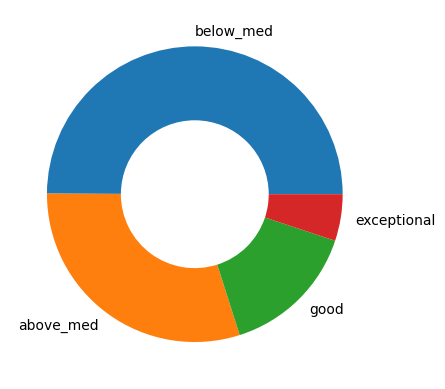

In [215]:
creative_data['effectiveness_category'].value_counts().plot.pie(wedgeprops=dict(width=0.5), ylabel='')

In [216]:
creative_data.to_csv('./data/creative_data.csv')

# Images

In [58]:
from PIL import Image

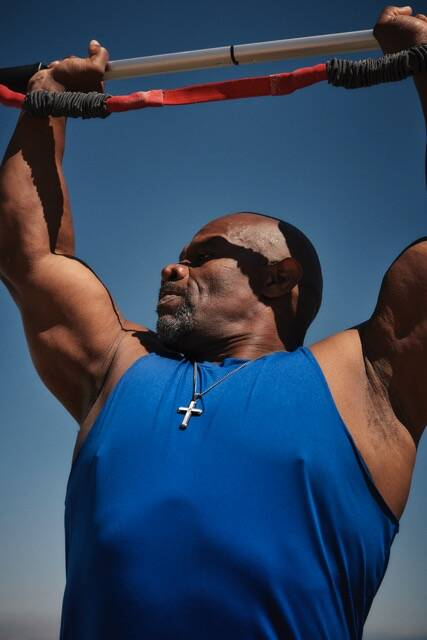

In [59]:
image = Image.open(images_path +'/' + images_list[0])
image

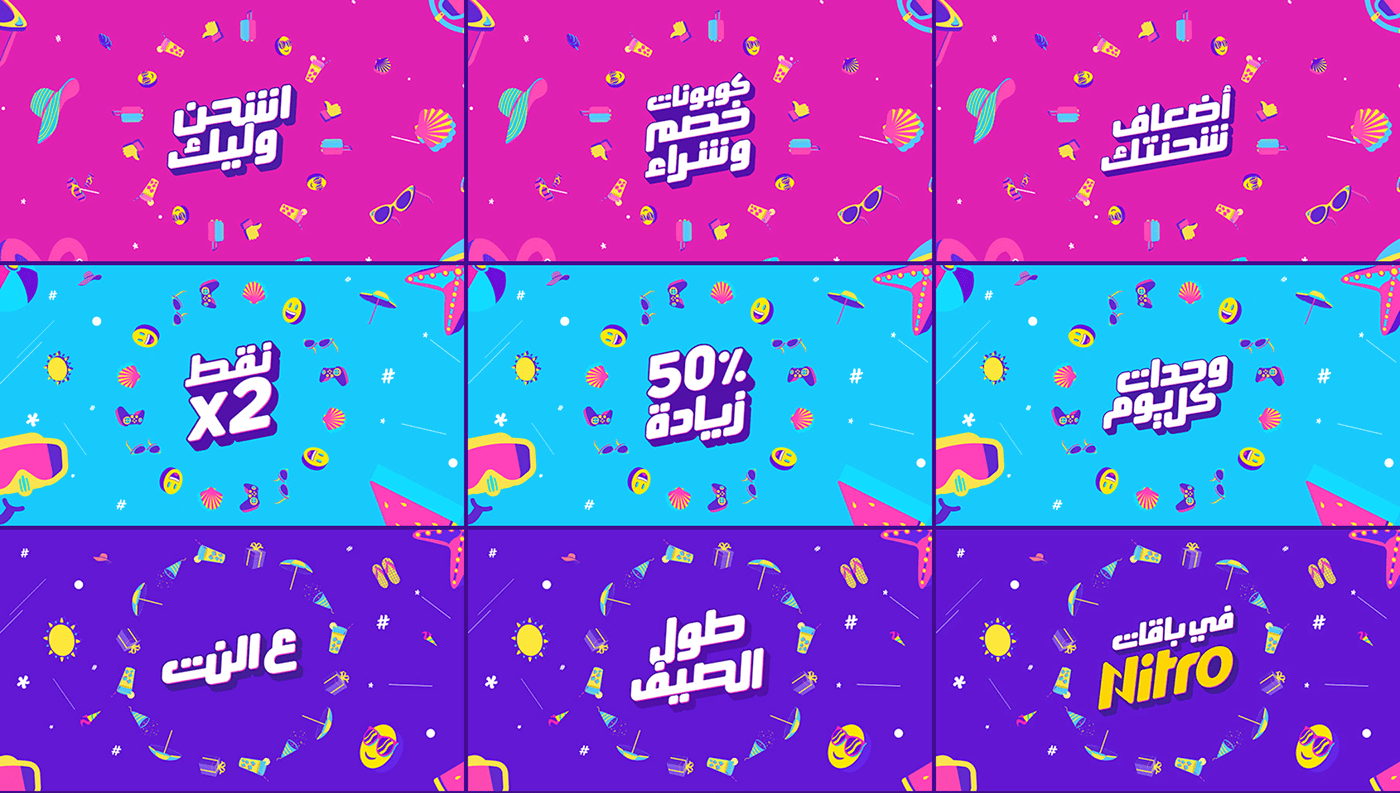

In [60]:
image = Image.open(images_path +'/' + images_list[200])
image

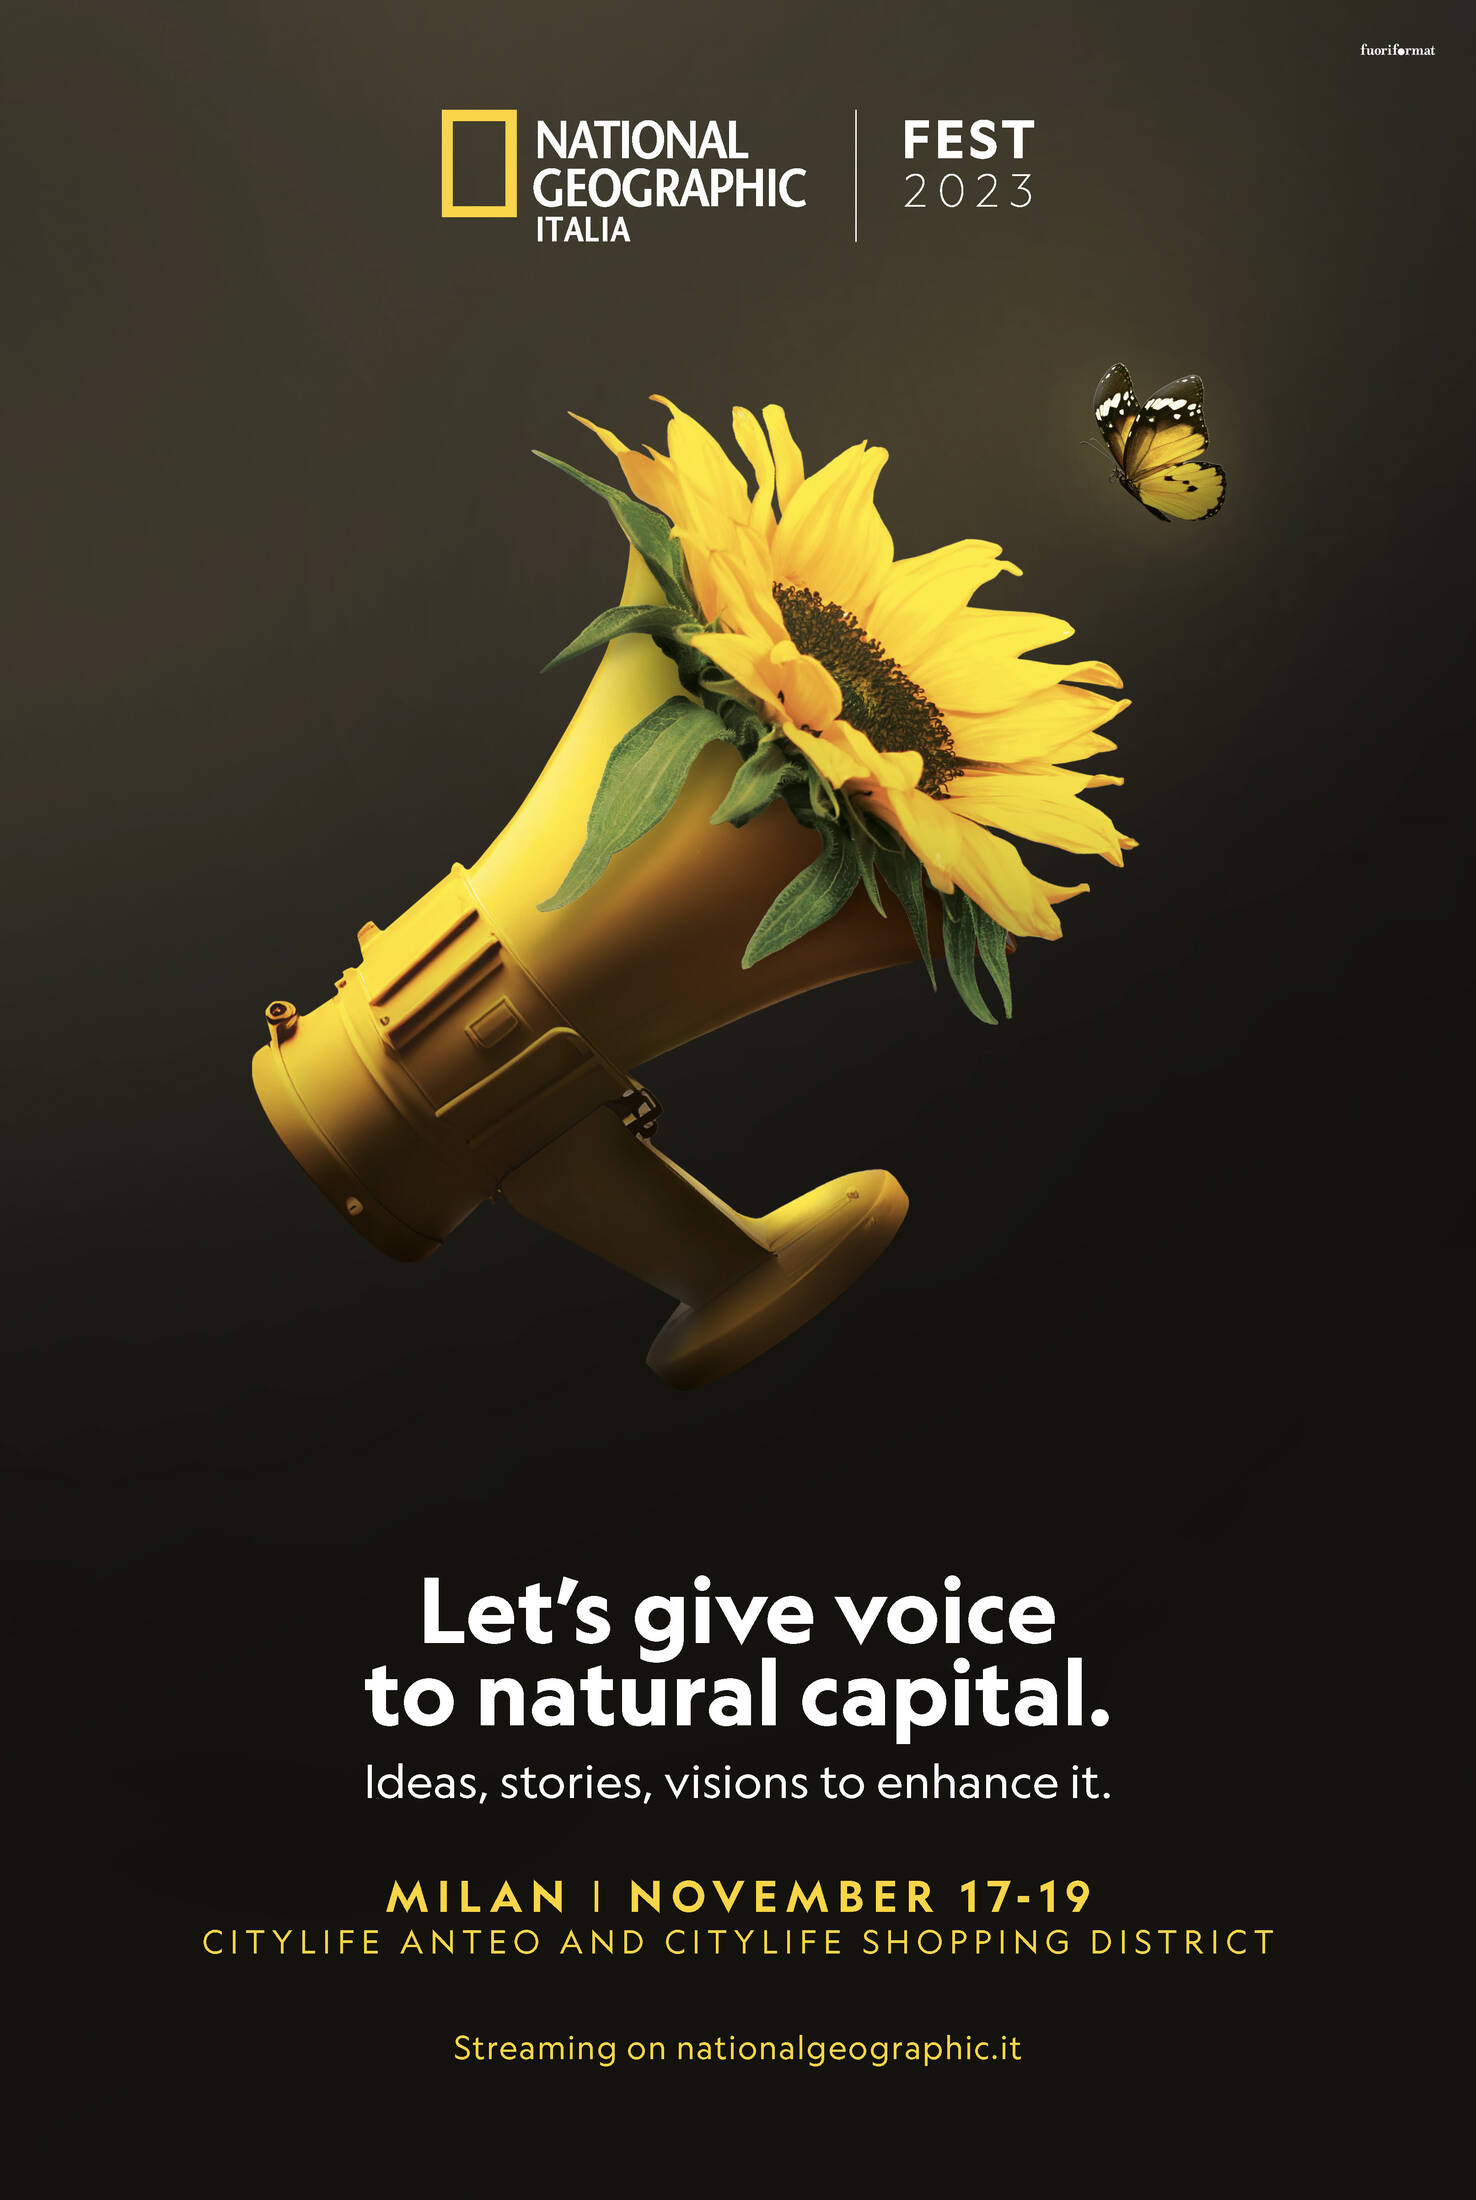

In [61]:
image = Image.open(images_path +'/' + images_list[911])
image

The images in the dataset are very diverse. In terms of image file, for example, they have different sizes. This is an important factor to take into account for the processing of the images, and also a possible feature to take into account (the aspect ratio rather than the size in pixels). We will produce also other "classical" image features

In [62]:
map_images_paths = {int(image_name.split('.')[0]): images_path +'/' + image_name for image_name in images_list}

## Classic features

In [ ]:
from sklearn.cluster import KMeans

In [153]:
def hsv_features(image: Image):
    """
    Compute some hsv features: saturation mean, warm/cool color pixel fraction
    Args:
        image (PIL.Image): Image to process and extract features from
    Returns:
        tuple:
            - float: Fraction of warm colored pixels
            - float: Fraction of cool colored pixels
            - float: Saturation average
    """
    hsv_image = np.array(image.convert('HSV')) / 255
    warm_mask = (hsv_image[:, :, 0] >= 0) & (hsv_image[:, :, 0] <= 1/6) | \
                     (hsv_image[:, :, 0] >= 1/6) & (hsv_image[:, :, 0] <= 1/3)
        
    cool_mask = (hsv_image[:, :, 0] >= 0.5) & (hsv_image[:, :, 0] <= 0.67)
    
    warm_pixels = np.sum(warm_mask)
    cool_pixels = np.sum(cool_mask)
    
    total_pixels = hsv_image.shape[0] * hsv_image.shape[1]

    warm_fraction = warm_pixels / total_pixels
    cool_fraction = cool_pixels / total_pixels
    sat_mean = np.mean(hsv_image[:, :, 1])
    return warm_fraction, cool_fraction, sat_mean

def dominant_colors(clustering: KMeans, image_np: np.array, n_colors: int = 10):
    """
    Extract dominant colors by clustering (kmins)
    Args:
        clustering: Clustering object externally instanced with n_clusters > n_colors
        image_np: numpy image array
    Returns:
        tuple:
            - np.array: cluster center colors sorted by cluster size
            - np.array: cluster pixel frequencies by cluster size
    """
    if n_colors > clustering.n_clusters:
        raise ValueError('Number of dominant colors to retrieve should be > number of clusters')
    pixels_table = image_np.reshape((-1,3))
    clustering.fit(pixels_table)
    clusters, counts = np.unique(clustering.labels_, return_counts = True)
    percentages = counts / pixels_table.shape[0]
    sorted_idx = np.argsort(percentages)
    sorted_colors = clustering.cluster_centers_[sorted_idx] / 255
    sorted_percentages = percentages[sorted_idx]
    return sorted_colors, sorted_percentages

In [197]:
top_color_number = 10
clustering = KMeans(n_clusters=top_color_number * 2)
list_features = []
flag_skip = True
for image_id, image_path in map_images_paths.items():
    print(f'features image {image_id}')
    image = Image.open(image_path)
    width, height = image.size
    aspect_ratio = width / height
    color = 1
    if image.mode == 'L':
       image = image.convert('RGB')
       color = 0
    elif image.mode == 'LA':
        lum, alp = image.split()
        rgb_image = Image.merge("RGB", (lum, lum, lum))
        background = Image.new("RGB", rgb_image.size, (250, 250, 250))
        image = Image.composite(rgb_image, background, alp)
        color = 0
    elif image.mode in ['P', 'RGBA', 'CMYK']:
       image = image.convert('RGB')
    ####
    image_np = np.array(image)
    red_mean, green_mean, blue_mean = image_np.mean(axis=(0,1)) / 255
    red_std, green_std, blue_std = image_np.std(axis=(0,1))
    #####
    image_gray = np.array(image.convert('L'))
    brightness = image_gray.mean() / 255
    contrast = image_gray.std()

    entropy = image.entropy()
    ###
    warm_fraction, cool_fraction, sat_mean = hsv_features(image)
    sorted_colors, sorted_percentages = dominant_colors(clustering, image_np, top_color_number)
    features = {
        'aspect_ratio': aspect_ratio,
         'color': color,
        'read_mean': red_mean,
        'green_mean': green_mean,
        'blue_mean': blue_mean,
        'red_std': red_std,
        'green_std': green_std,
        'blue_std': blue_std,
        'brightness': brightness,
        'contrast': contrast,
        'entropy': entropy,
        'warm_fraction': warm_fraction,
        'cool_fraction': cool_fraction,
        'saturation_mean': sat_mean,
    }
    for ic in range(top_color_number):
        for ib, b in enumerate(['red', 'green', 'blue']): 
            features[f'{b}_dom_color{ic}'] = sorted_colors[ic][ib]
        features[f'weight_dom_color{ic}'] = sorted_percentages[ic]
    list_features.append(
       features
    )
    
creative_features = pd.DataFrame(index=map_images_paths.keys(), data=list_features)


skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip


C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


features image 13780
features image 13785
features image 13790
features image 13795
features image 1380
features image 13800
features image 13805
features image 13810
features image 13815
features image 13820
features image 13825
features image 13830
features image 13835
features image 13840
features image 13845
features image 1385
features image 13850
features image 13855
features image 13860
features image 13865
features image 13870
features image 13875
features image 13880
features image 13885
features image 13890
features image 13895
features image 1390
features image 13900
features image 13905
features image 13910
features image 13915
features image 13920
features image 13925
features image 13930
features image 13935
features image 13940
features image 13945
features image 1395
features image 13950
features image 13955
features image 13960
features image 13965
features image 13970
features image 13975
features image 13980
features image 13985
features image 13990
features image 13

C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


features image 14655
features image 14660
features image 14665
features image 14670
features image 14675
features image 14680
features image 14685
features image 14690
features image 14695
features image 1470
features image 14700
features image 14705
features image 14710
features image 14715
features image 14720
features image 14725
features image 14730
features image 14735
features image 14740
features image 14745
features image 1475
features image 14750
features image 14755
features image 14760
features image 14765
features image 14770
features image 14775
features image 14780
features image 14785
features image 14790
features image 14795
features image 1480
features image 14800
features image 14805
features image 14810
features image 14815
features image 14820
features image 14825
features image 14830
features image 14835
features image 14840
features image 14845
features image 1485
features image 14850
features image 14855
features image 14860
features image 14865
features image 14

C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


features image 3645
features image 3650
features image 3655
features image 3660
features image 3665
features image 3670
features image 3675
features image 3680
features image 3685
features image 3690
features image 3695
features image 3700
features image 3705
features image 3710
features image 3715
features image 3720
features image 3725
features image 3730
features image 3735
features image 3740
features image 3745
features image 3750
features image 3755
features image 3760
features image 3765
features image 3770
features image 3775
features image 3780
features image 3785
features image 3790
features image 3795
features image 3800
features image 3805
features image 3810
features image 3815
features image 3820
features image 3825
features image 3830
features image 3835
features image 3840
features image 3845
features image 3850
features image 3855
features image 3860
features image 3865
features image 3870
features image 3875
features image 3880
features image 3885
features image 3890


C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


features image 4995
features image 5000
features image 5005
features image 5010
features image 5015
features image 5020
features image 5025
features image 5030
features image 5035
features image 5040
features image 5045
features image 5050
features image 5055
features image 5060
features image 5065
features image 5070
features image 5075
features image 5080
features image 5085
features image 5090
features image 5095
features image 5100
features image 5105
features image 5110
features image 5115
features image 5120
features image 5125
features image 5130
features image 5135
features image 5140
features image 5145
features image 5150
features image 5155
features image 5160
features image 5165
features image 5170
features image 5175
features image 5180
features image 5185
features image 5190
features image 5195
features image 5200
features image 5205
features image 5210
features image 5215
features image 5220
features image 5225
features image 5230
features image 5235
features image 5240


In [212]:
creative_features.index.name = 'creative_id'

In [213]:
creative_features.to_csv('classical_creative_features.csv')

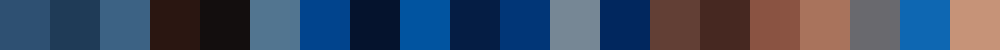

In [202]:
# example top colors
num_colors=20
square_size = 50  
img_colors = Image.new('RGB', (num_colors, 1))
for i, color in enumerate(df_colors['color']):
    img_colors.putpixel((i, 0), tuple(color))
img_colors = img_colors.resize((num_colors * square_size, square_size), Image.NEAREST)  

img_colors

In [ ]:
# explore other classical image features TODO
#aesthetic features
# edges = cv2.Canny(image_gray, 100, 200)
# edge_density = np.mean(edges)
# blur_level = cv2.Laplacian(img_gray, cv2.CV_64F).var()
# #symmetry
# #  horizontal, vertical, diagonal

#Features related to shapes and features are difficult to reduce to metrics or few dimensions.
# Most methods usually produce images of the original size or arrays of variable length
# Considering that modern vision foundation models can represent with a lot of detail the content of the images, it's probably worth it to rely
# on them for complex features

## Modern features

Use pre-trained transformers or other modern deep learning models to produce features. This can be

### Vision foundation model

In [ ]:
import json
from transformers import AutoModel, CLIPImageProcessor

model = AutoModel.from_pretrained(
    'OpenGVLab/InternViT-6B-448px-V1-5',
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True).cuda().eval()


image_processor = CLIPImageProcessor.from_pretrained('OpenGVLab/InternViT-6B-448px-V1-5')

# vision foundation model that produces embeddings that can be used, for example, to build a  multimodal large language model 
#https://huggingface.co/OpenGVLab/InternViT-6B-448px-V1-5
#medium sized (6B), requires GPU. Would definitely explore in the future the use of larger model or the new v2 MLLM by OpenGVLab

In [ ]:
# Processing of the whole dataset.
# A pipeline for processing a new image will include this (except the loop) if the results are positive
output_features_gvlab_vit6b = {}
for image_id, image_path in map_images_paths.items():
  print(f'features image {image_id}')
  image = Image.open(image_path)
  with torch.no_grad():
    pixel_values = image_processor(images=image, return_tensors='pt').pixel_values
    pixel_values = pixel_values.to(torch.bfloat16).cuda()

    outputs = model(pixel_values)
    output_features_gvlab_vit6b[image_id] = outputs.pooler_output

In [ ]:
# save ouputs. 
output_features_gvlab_vit6b_lists = {}
for figure_id, feats in output_features_gvlab_vit6b.items():
    #serialize to lists
    output_features_gvlab_vit6b_lists[figure_id] = feats.squeeze().tolist()
with open('output_features_gvlab_vit6b.json', 'w') as jfile:
    json.dump(output_features_gvlab_vit6b_lists, jfile)

### Image classification model - embeddings

In [217]:
#embeddings using an image classifier model (removing last layer to calculate class probabilities)

import timm

model = timm.create_model(
    'vit_large_patch14_dinov2.lvd142m',
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
)
model = model.cuda().eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)


In [ ]:
# Processing of the whole dataset
# by batches to leverage the gpu. Again, if we were to add this as part of the model, the timm model should be
# part of the processing pipeline for a single image
output_features_dinov2 = {}
batch_size = 25
batch_images = []
batch_ids = []

im_count = 0
for image_id, image_path in map_images_paths.items():
  im_count += 1
  print(f'features image {image_id}')
  image = Image.open(image_path)
 
  if image.mode == 'L':
       image = image.convert('RGB')
       color = 0
  elif image.mode == 'LA':
        lum, alp = image.split()
        rgb_image = Image.merge("RGB", (lum, lum, lum))
        background = Image.new("RGB", rgb_image.size, (250, 250, 250))
        image = Image.composite(rgb_image, background, alp)
        color = 0
  elif image.mode in ['P', 'RGBA', 'CMYK']:
       image = image.convert('RGB')

  trans_image = transforms(image)
  batch_images.append(trans_image)
  batch_ids.append(image_id)
  if ((len(batch_images) == batch_size) or (img_count == len(map_images_paths)):

    with torch.no_grad():
      batch_images = torch.stack(batch_images).cuda()
      output_batch =  model(batch_images) #.unsqueeze(0) if only 1 image to convert to batch
    for idx, image_id in enumerate(batch_ids):
      output_features_dinov2[image_id] = output_batch[idx].cpu()
    batch_images = []
    batch_ids = []


In [ ]:
# save ouputs. 
output_features_dinov2_lists = {}
for figure_id, feats in output_features_dinov2.items():
  output_features_dinov2_lists[figure_id] = feats.squeeze().tolist()

with open('output_features_dinov2.json', 'w') as jfile:
  json.dump(output_features_dinov2_lists, jfile)

### Image to text models - embeddings

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

# image to text model (will use unconditional mode, only image input)
# instead of the tokens/text output, we will use the embeddings of the tokens.
# In order to reduce the size and make it fixed per image, we will use the mean embedding

In [ ]:
output_embed_captions = {}
batch_size = 25
batch_images = []
batch_ids = []

im_count = 0
for image_id, image_path in map_images_paths.items():
  im_count += 1
  print(f'features image {image_id}')
  image = Image.open(image_path)
 
  if image.mode == 'L':
       image = image.convert('RGB')
       
  elif image.mode == 'LA':
        lum, alp = image.split()
        rgb_image = Image.merge("RGB", (lum, lum, lum))
        background = Image.new("RGB", rgb_image.size, (250, 250, 250))
        image = Image.composite(rgb_image, background, alp)
        
  elif image.mode in ['P', 'RGBA', 'CMYK']:
       image = image.convert('RGB')

  batch_images.append(image)
  batch_ids.append(image_id)
  if ((len(batch_images) == batch_size) or (img_count == len(map_images_paths)):
    inputs = processor(images=batch_images, return_tensors="pt")#, padding=True)
    
    with torch.no_grad():
      inputs = {kk: vv.cuda() for kk, vv in inputs.items()}
      generated_ids = model.generate(**inputs)
      encoder_outputs = model.vision_model(**inputs).last_hidden_state
      decoder_outputs = model.text_decoder(
        input_ids=generated_ids, 
        encoder_hidden_states=encoder_outputs,
        output_hidden_states=True
      )
    text_embeddings = decoder_outputs.hidden_states[-1]
    pooled_embeddings = text_embeddings.mean(dim=1)
    pooled_embeddings_np = pooled_embeddings.cpu().numpy()
    for idx, image_id in enumerate(batch_ids):
      output_embed_captions[image_id] = pooled_embeddings_np[idx]
    batch_images = []
    batch_ids = []
    

In [134]:
from transformers import ViTImageProcessor, ViTModel

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

C:\Users\david\projects\smartassets_challenge\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\david\.cache\huggingface\hub\models--google--vit-base-patch16-224-in21k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [135]:
last_hidden_states 

tensor([[[ 0.2038, -0.2099, -0.1520,  ..., -0.2820,  0.0566,  0.4307],
         [ 0.4146, -0.0182, -0.1603,  ..., -0.3333, -0.0897,  0.2124],
         [ 0.0539, -0.0543, -0.1180,  ..., -0.2336, -0.0726,  0.1947],
         ...,
         [ 0.3649, -0.0193, -0.4419,  ..., -0.4117, -0.0390, -0.0398],
         [ 0.1507, -0.1614, -0.3304,  ..., -0.3767,  0.0040, -0.1228],
         [ 0.1456, -0.2410, -0.0874,  ..., -0.1257,  0.0721,  0.1278]]],
       grad_fn=<NativeLayerNormBackward0>)

In [136]:
last_hidden_states.shape

torch.Size([1, 197, 768])

In [ ]:
#hidden layer can be used to train a lin layer for classification (good/bad add?)
class CustomViT(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomViT, self).__init__()
        self.vit = base_model
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_classes)  # Linear layer for classification

    def forward(self, x):
        # Step 3: Forward pass through ViT
        outputs = self.vit(x)
        cls_output = outputs.last_hidden_state[:, 0]  # Get the [CLS] token output
        logits = self.classifier(cls_output)  # Pass through the classifier
        return logits

# Step 4: Initialize the custom model with the desired number of classes
num_classes = 10  # Replace with your number of classes
custom_model = CustomViT(model, num_classes)

# Step 5: Prepare for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
custom_model.to(device)

# Example training setup
# Define a loss function and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=1e-5)

# Sample training loop (pseudo code)
def train_model(custom_model, dataloader, num_epochs):
    custom_model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        for images, labels in dataloader:
            images = processor(images=images, return_tensors="pt").to(device)  # Preprocess images
            labels = labels.to(device)  # Move labels to device
            
            optimizer.zero_grad()  # Zero the gradients
            outputs = custom_model(images['pixel_values'])  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class ImageDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get the image ID and label
        img_id = self.dataframe.iloc[idx, 0]  # Assuming the first column is the image ID
        label = self.dataframe.iloc[idx, 1]  # Assuming the second column is the class label

        # Load the image
        img_path = os.path.join(self.image_folder, img_id)
        image = Image.open(img_path).convert("RGB")

        # Apply any transformations
        if self.transform:
            image = self.transform(image)

        return image, label

In [139]:
processor 

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [171]:

model = timm.create_model(
    'resnet50.a1_in1k',
    pretrained=True,
    #features_only=True,
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(image).unsqueeze(0))  # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 64, 112, 112])
    #  torch.Size([1, 256, 56, 56])
    #  torch.Size([1, 512, 28, 28])
    #  torch.Size([1, 1024, 14, 14])
    #  torch.Size([1, 2048, 7, 7])

    print(o.shape)


torch.Size([1000])


In [175]:
output_ff = model.forward_features(transforms(image).unsqueeze(0))
feat = model.forward_head(output_ff, pre_logits=True)

In [176]:
feat.shape

torch.Size([1, 2048])

In [179]:
#image to text . use embeddings

from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# conditional image captioning
text = "a creative of"
inputs = processor(image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# # unconditional image captioning
# inputs = processor(image, return_tensors="pt")

# out = model.generate(**inputs)
# print(processor.decode(out[0], skip_special_tokens=True))


a creative of a sunflower in a megaphone with a bee flying around


In [189]:
out

tensor([[30522,  1037,  5541,  1997,  1037,  3103, 14156,  1999,  1037, 13164,
          9864,  2007,  1037, 10506,  3909,  2105,   102]])

In [188]:
model.last_hidden_state

AttributeError: 'BlipForConditionalGeneration' object has no attribute 'last_hidden_state'

# object detection models

In [141]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [155]:
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.3)

In [165]:
outputs.logits.shape

torch.Size([1, 100, 92])

In [166]:
outputs.last_hidden_state.shape

torch.Size([1, 100, 256])

In [194]:
outputs.last_hidden_state.squeeze().shape

torch.Size([100, 256])

In [190]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)



Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\david\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 25.9MB/s]


In [191]:
results = model(image)


0: 640x448 1 potted plant, 168.5ms
Speed: 0.0ms preprocess, 168.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


In [196]:
results[0].show()

In [210]:
results[0].__dict__

{'orig_img': array([[[45, 57, 61],
         [45, 57, 61],
         [45, 57, 61],
         ...,
         [35, 38, 43],
         [35, 38, 43],
         [35, 38, 43]],
 
        [[45, 57, 61],
         [45, 57, 61],
         [45, 57, 61],
         ...,
         [35, 38, 43],
         [35, 38, 43],
         [35, 38, 43]],
 
        [[45, 57, 61],
         [45, 57, 61],
         [45, 57, 61],
         ...,
         [35, 38, 43],
         [35, 38, 43],
         [35, 38, 43]],
 
        ...,
 
        [[14, 17, 22],
         [14, 17, 22],
         [14, 17, 22],
         ...,
         [14, 18, 19],
         [14, 18, 19],
         [14, 18, 19]],
 
        [[14, 17, 22],
         [14, 17, 22],
         [14, 17, 22],
         ...,
         [14, 18, 19],
         [14, 18, 19],
         [14, 18, 19]],
 
        [[14, 17, 22],
         [14, 17, 22],
         [14, 17, 22],
         ...,
         [14, 18, 19],
         [14, 18, 19],
         [14, 18, 19]]], dtype=uint8),
 'orig_shape': (2200, 1476),
 

In [232]:
from transformers import AutoModelForCausalLM, AutoProcessor, GenerationConfig


# load the processor
processor = AutoProcessor.from_pretrained(
    'allenai/Molmo-7B-D-0924',
    trust_remote_code=True,
    torch_dtype='auto',
    device_map='auto'
)

# load the model
model = AutoModelForCausalLM.from_pretrained(
    'allenai/Molmo-7B-D-0924',
    trust_remote_code=True,
    torch_dtype='auto',
    device_map='auto'
)

# process the image and text
inputs = processor.process(
    images=[image],
    text="Describe this image in detail."
)

# move inputs to the correct device and make a batch of size 1
inputs = {k: v.to(model.device).unsqueeze(0) for k, v in inputs.items()}

# generate output; maximum 200 new tokens; stop generation when <|endoftext|> is generated
output = model.generate_from_batch(
    inputs,
    GenerationConfig(max_new_tokens=200, stop_strings="<|endoftext|>"),
    tokenizer=processor.tokenizer
)

# only get generated tokens; decode them to text
generated_tokens = output[0,inputs['input_ids'].size(1):]
generated_text = processor.tokenizer.decode(generated_tokens, skip_special_tokens=True)

# print the generated text
print(generated_text)


ImportError: Using `low_cpu_mem_usage=True` or a `device_map` requires Accelerate: `pip install 'accelerate>=0.26.0'`

In [268]:
len(train_data[train_data.ctir > 5])/len(train_data)

0.047068891741549

In [269]:
len(test_data[test_data.ctir > 5])/len(test_data)

0.05299145299145299